In [1]:
## import the necessary libraries and packages
import pandas as pd
import numpy as np

In [7]:
## import and save the cab data in to the data variables
data=pd.read_csv('Cab_Data.csv')

In [8]:
## Lets check and analyse how the data looks like
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
## Lets see the column names for this data
data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [4]:
### Import the transaction ID data and save it in the data1 variable
data1=pd.read_csv('Transaction_ID.csv')

In [6]:
## Lets analyse the top of the data
data1.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [25]:
import pandas as pd

# Now lets merge the two dataFrames, transaction IDs and cab data based on the 'transaction ID' column
## I will use 'how='outer'' to maintain all rows and replace missing rows with NAs 
merged_df = pd.merge(data, data1, on='Transaction ID', how='outer')

# Lets save the merged dataFrame to a new Excel file
merged_df.to_excel('C:/Users/USER/Documents/Mergedone.xlsx', index=False)


In [32]:
## Lets save the new merged dataframe in to the data2 variable for downstream analysis
data2=pd.read_excel('Mergedone.xlsx')

In [33]:
data2.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024,27318,Cash
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200,33788,Card
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890,34106,Card
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880,59799,Cash
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256,57982,Cash


In [34]:
data2.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode'],
      dtype='object')

In [35]:
## Lets check the nature of our data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  440098 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Customer ID     440098 non-null  int64         
 8   Payment_Mode    440098 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 30.2+ MB


In [22]:
## Lets check the simple descriptive stats for our numerical data
data2.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,2017-08-17 01:37:55.042293760,22.567254,423.443311,286.190113,19191.652115
min,1.000001e+07,2016-01-02 00:00:00,1.900000,15.600000,19.000000,1.000000
25%,1.011081e+07,2016-11-23 00:00:00,12.000000,206.437500,151.200000,2705.000000
50%,1.022104e+07,2017-09-10 00:00:00,22.440000,386.360000,282.480000,7459.000000
75%,1.033094e+07,2018-05-12 00:00:00,32.960000,583.660000,413.683200,36078.000000
max,1.044011e+07,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,60000.000000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661,21012.412463


In [36]:
## lets save the object datatype columns in the cat_var variable and check counts of unique values for each categories
cat_var = data2.select_dtypes('object')
for i in cat_var:
    print(cat_var[i].value_counts())
    print('------------------------------------------')

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64
------------------------------------------
City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64
------------------------------------------
Payment_Mode
Card    263991
Cash    176107
Name: count, dtype: int64
------------------------------------------


In [37]:
## Basing off the merged data, retained rows contained lots of NAs, for morethan 50% of data
## Imputation of the NAs will be hard or close to impossible
## Therefore we merge data based on strictly identical rows 
data2.isnull().sum()

Transaction ID        0
Date of Travel    80706
Company           80706
City              80706
KM Travelled      80706
Price Charged     80706
Cost of Trip      80706
Customer ID           0
Payment_Mode          0
dtype: int64

In [38]:
# Now lets merge the two dataFrames, transaction IDs and cab data based on the 'transaction ID' column
## I will use 'how='inner'' to maintain all rows and replace missing rows with NAs 
merged_df = pd.merge(data, data1, on='Transaction ID', how='inner')

# Save the merged DataFrame to a new Excel file
merged_df.to_excel('C:/Users/USER/Documents/Python Scripts/Mergedone.xlsx', index=False)

In [76]:
data3=pd.read_excel('Mergedone.xlsx')

In [77]:
data3.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024,27318,Cash
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200,33788,Card
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890,34106,Card
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880,59799,Cash
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256,57982,Cash


In [48]:
data3.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode'],
      dtype='object')

In [51]:
## Lets drop the two columns not relevant for descriptive analysis
data3.drop(['Transaction ID','Customer ID'], axis=1).describe()

,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,359392.000000
mean,42964.067998,22.567254,423.443311,286.190113
std,307.467197,12.233526,274.378911,157.993661
min,42371.000000,1.900000,15.600000,19.000000
25%,42697.000000,12.000000,206.437500,151.200000
50%,42988.000000,22.440000,386.360000,282.480000
75%,43232.000000,32.960000,583.660000,413.683200
max,43465.000000,48.000000,2048.030000,691.200000


In [42]:
data3.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Customer ID       0
Payment_Mode      0
dtype: int64

In [43]:
## lets save the object datatype columns in the cat_var variable and check counts of unique values for each categories
cat_var = data3.select_dtypes('object')
for i in cat_var:
    print(cat_var[i].value_counts())
    print('-------------------------------------------------')

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64
------------------------------------------
City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64
------------------------------------------
Payment_Mode
Card    215504
Cash    143888
Name: count, dtype: int64
------------------------------------------


### Univariate analysis

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

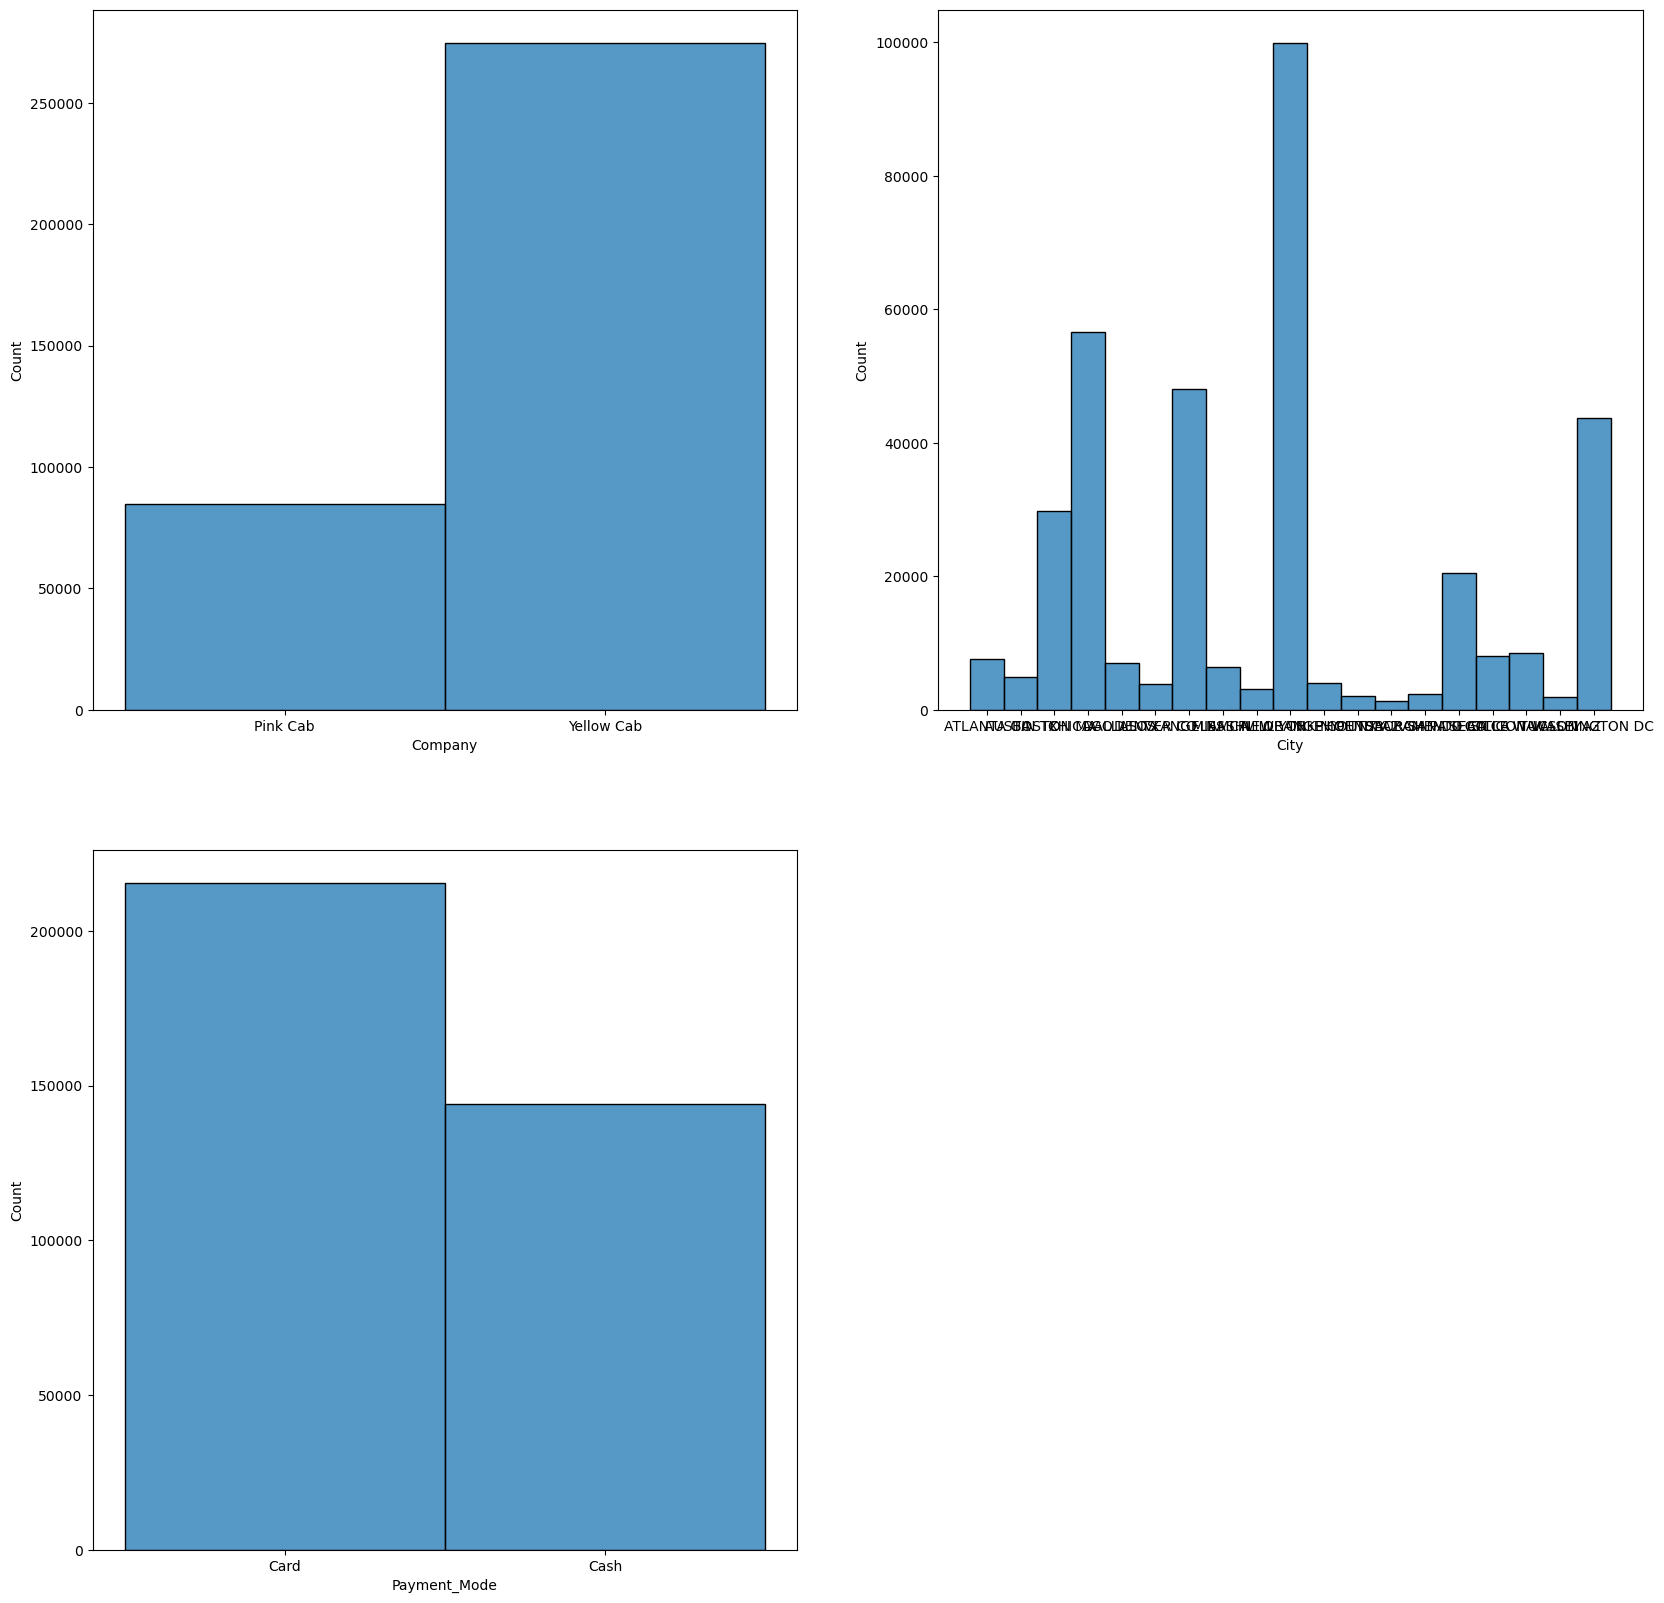

In [53]:
plt.figure(num=10, figsize=(20,20))
platenum=1
for i in cat_var:
    if platenum<10:
        plt.subplot(2,2,platenum)
        sns.histplot(data=data3,x=cat_var[i])
    platenum+=1

* The yellow cab company has more records in terms of transcations compared to Pink cab
* New york city had the most transcation and PITTSBURGH PA has the lowest number of transactions
* More users paid using a card compared to cash payment.

In [54]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Customer ID     359392 non-null  int64  
 8   Payment_Mode    359392 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 24.7+ MB


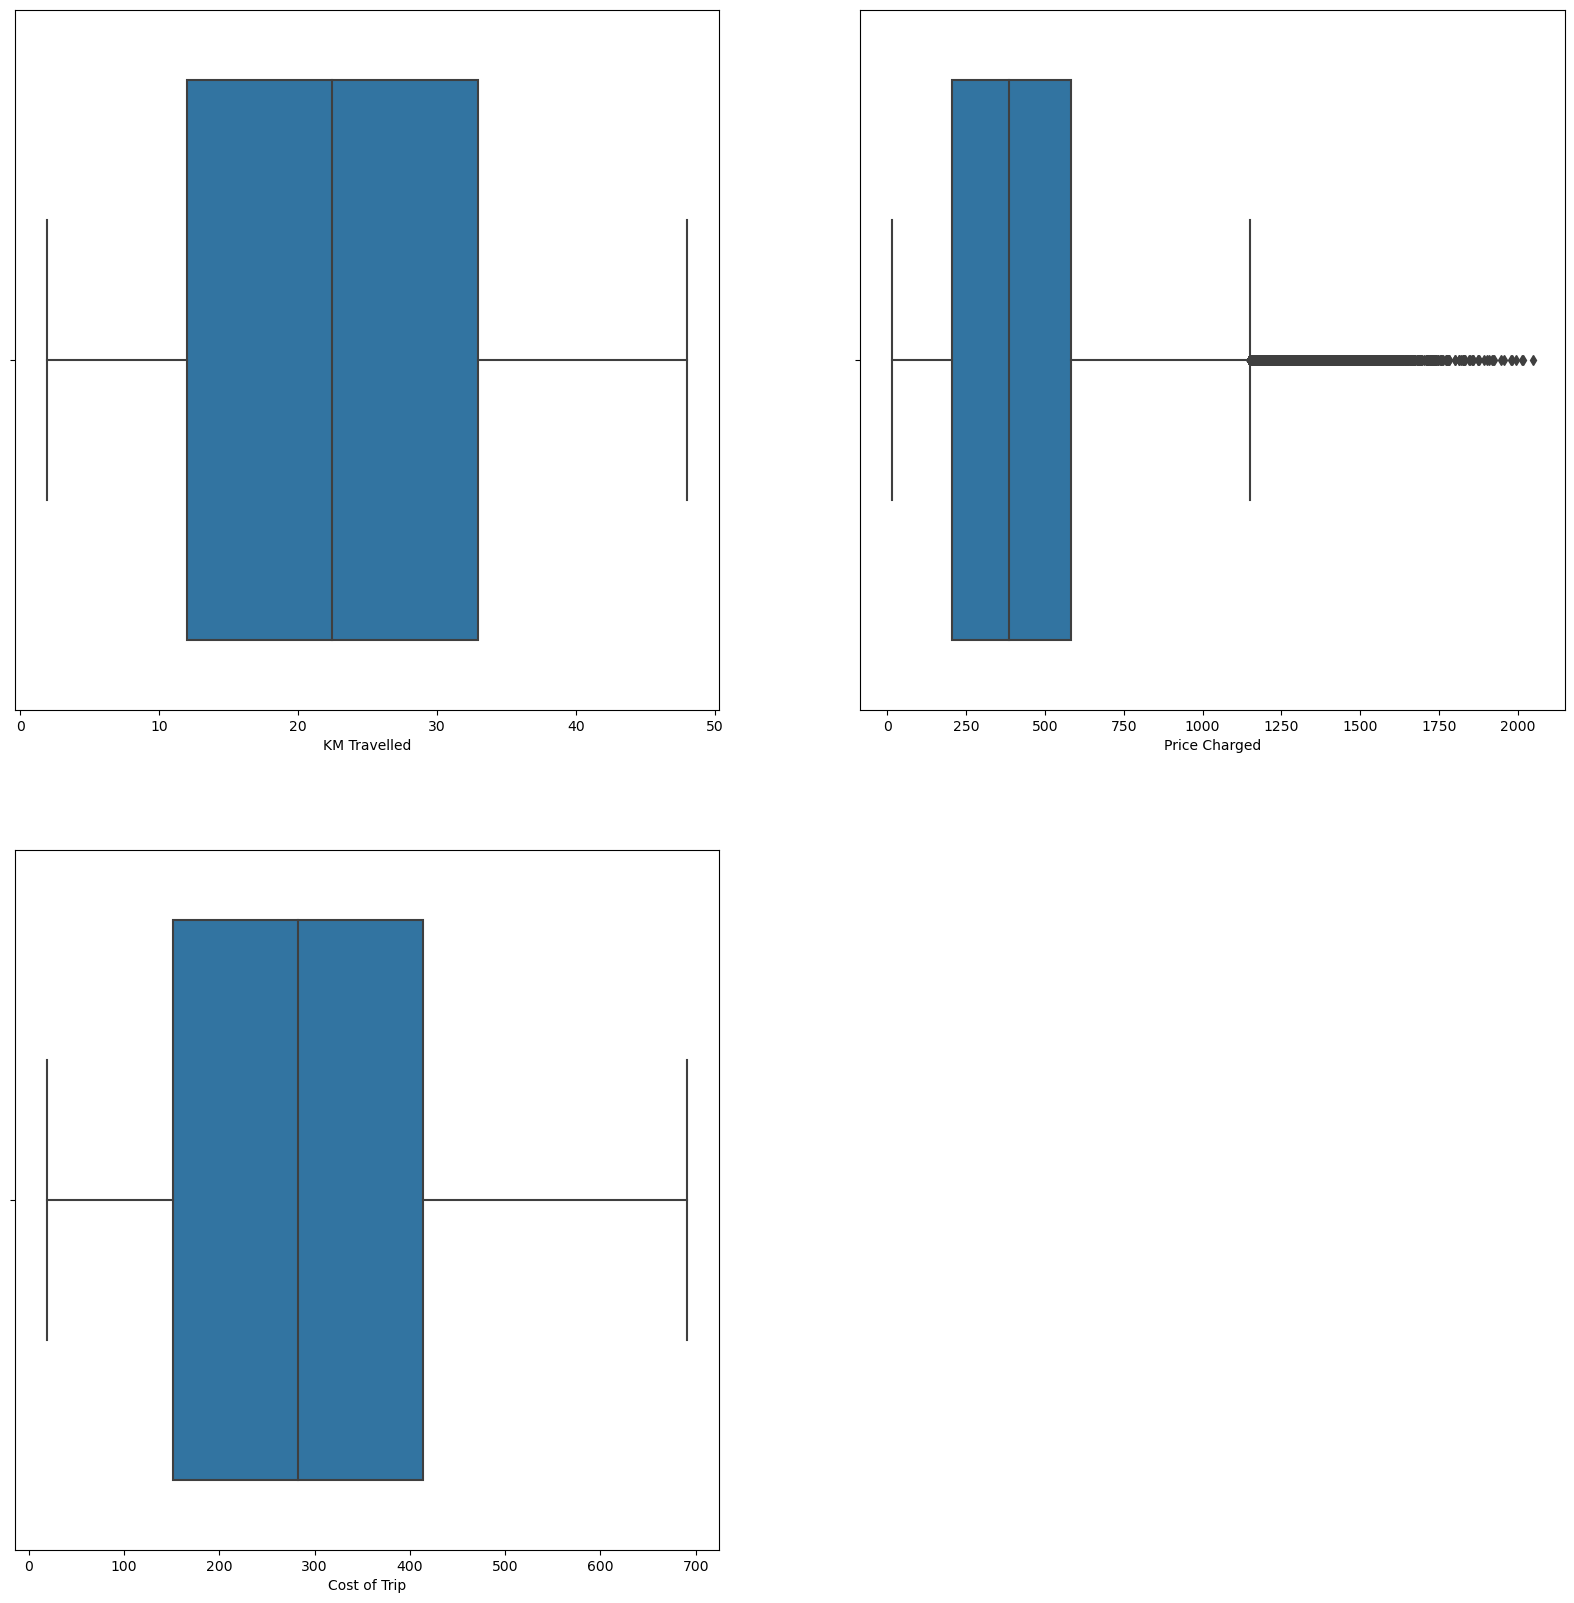

In [56]:
num_var=data3.select_dtypes('float64')
plt.figure(num=10, figsize=(20,20))
platenum=1
for i in num_var:
    if platenum<10:
        plt.subplot(2,2,platenum)
        sns.boxplot(data=data3,x=num_var[i])
    platenum+=1

* The average KM travelled by all individuals was 22.567254
* The average price change was 423.443311
* The average cost of the trip was 286.190113

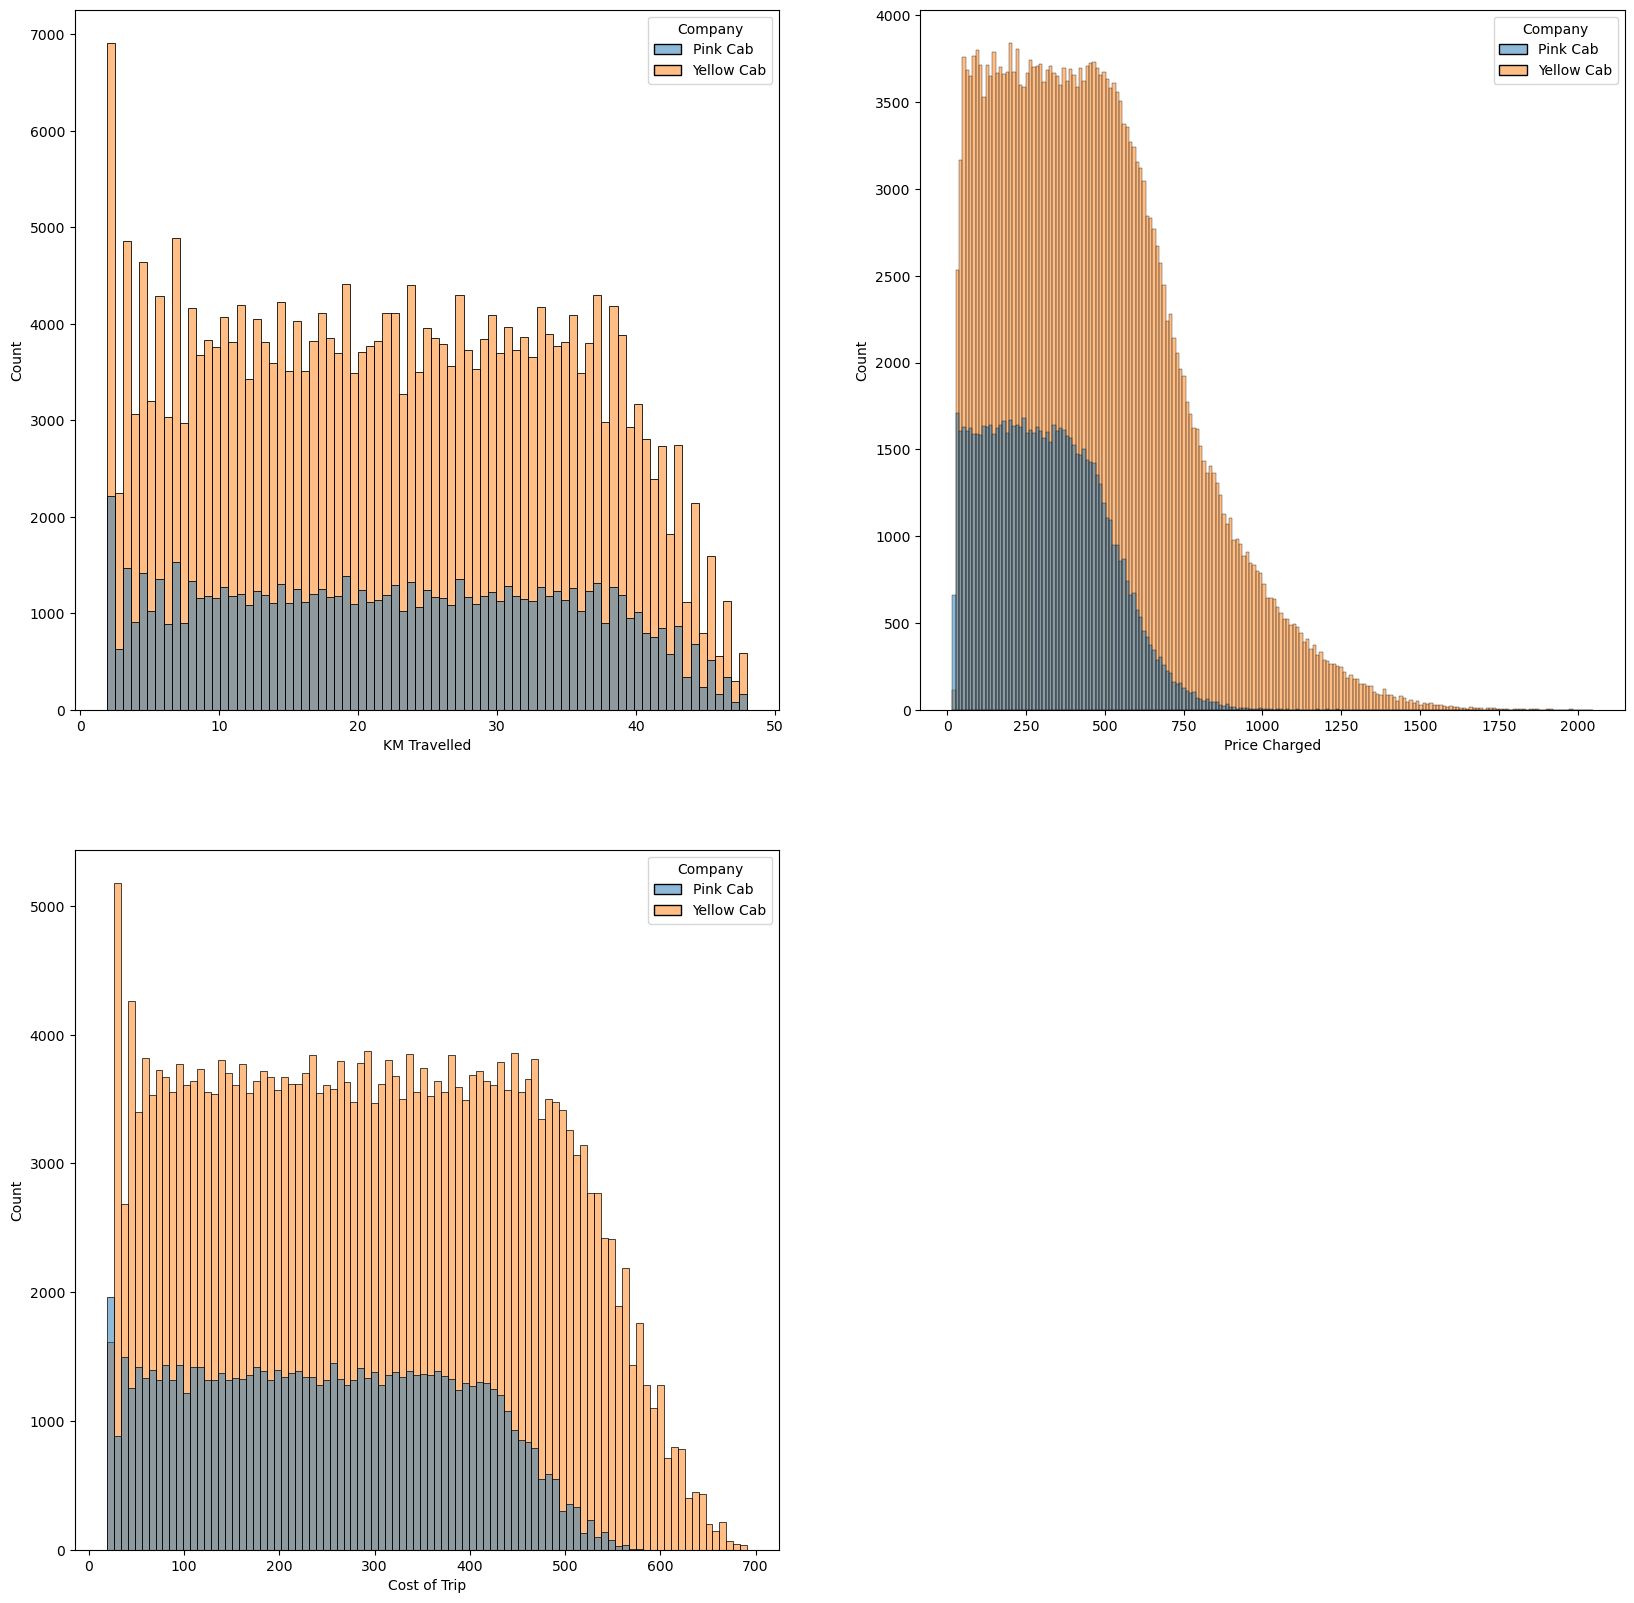

In [70]:
num_var=data3.select_dtypes('float64')
plt.figure(num=10, figsize=(20,20))
platenum=1
for i in num_var:
    if platenum<10:
        plt.subplot(2,2,platenum)
        sns.histplot(data=data3,x=num_var[i], hue='Company')
    platenum+=1

* The yellow cab had more KM travelled, price changes and comparably higher costs of the trips
* This maybe due to the data imbalance with more records for the yellow cab compared to the pink cab

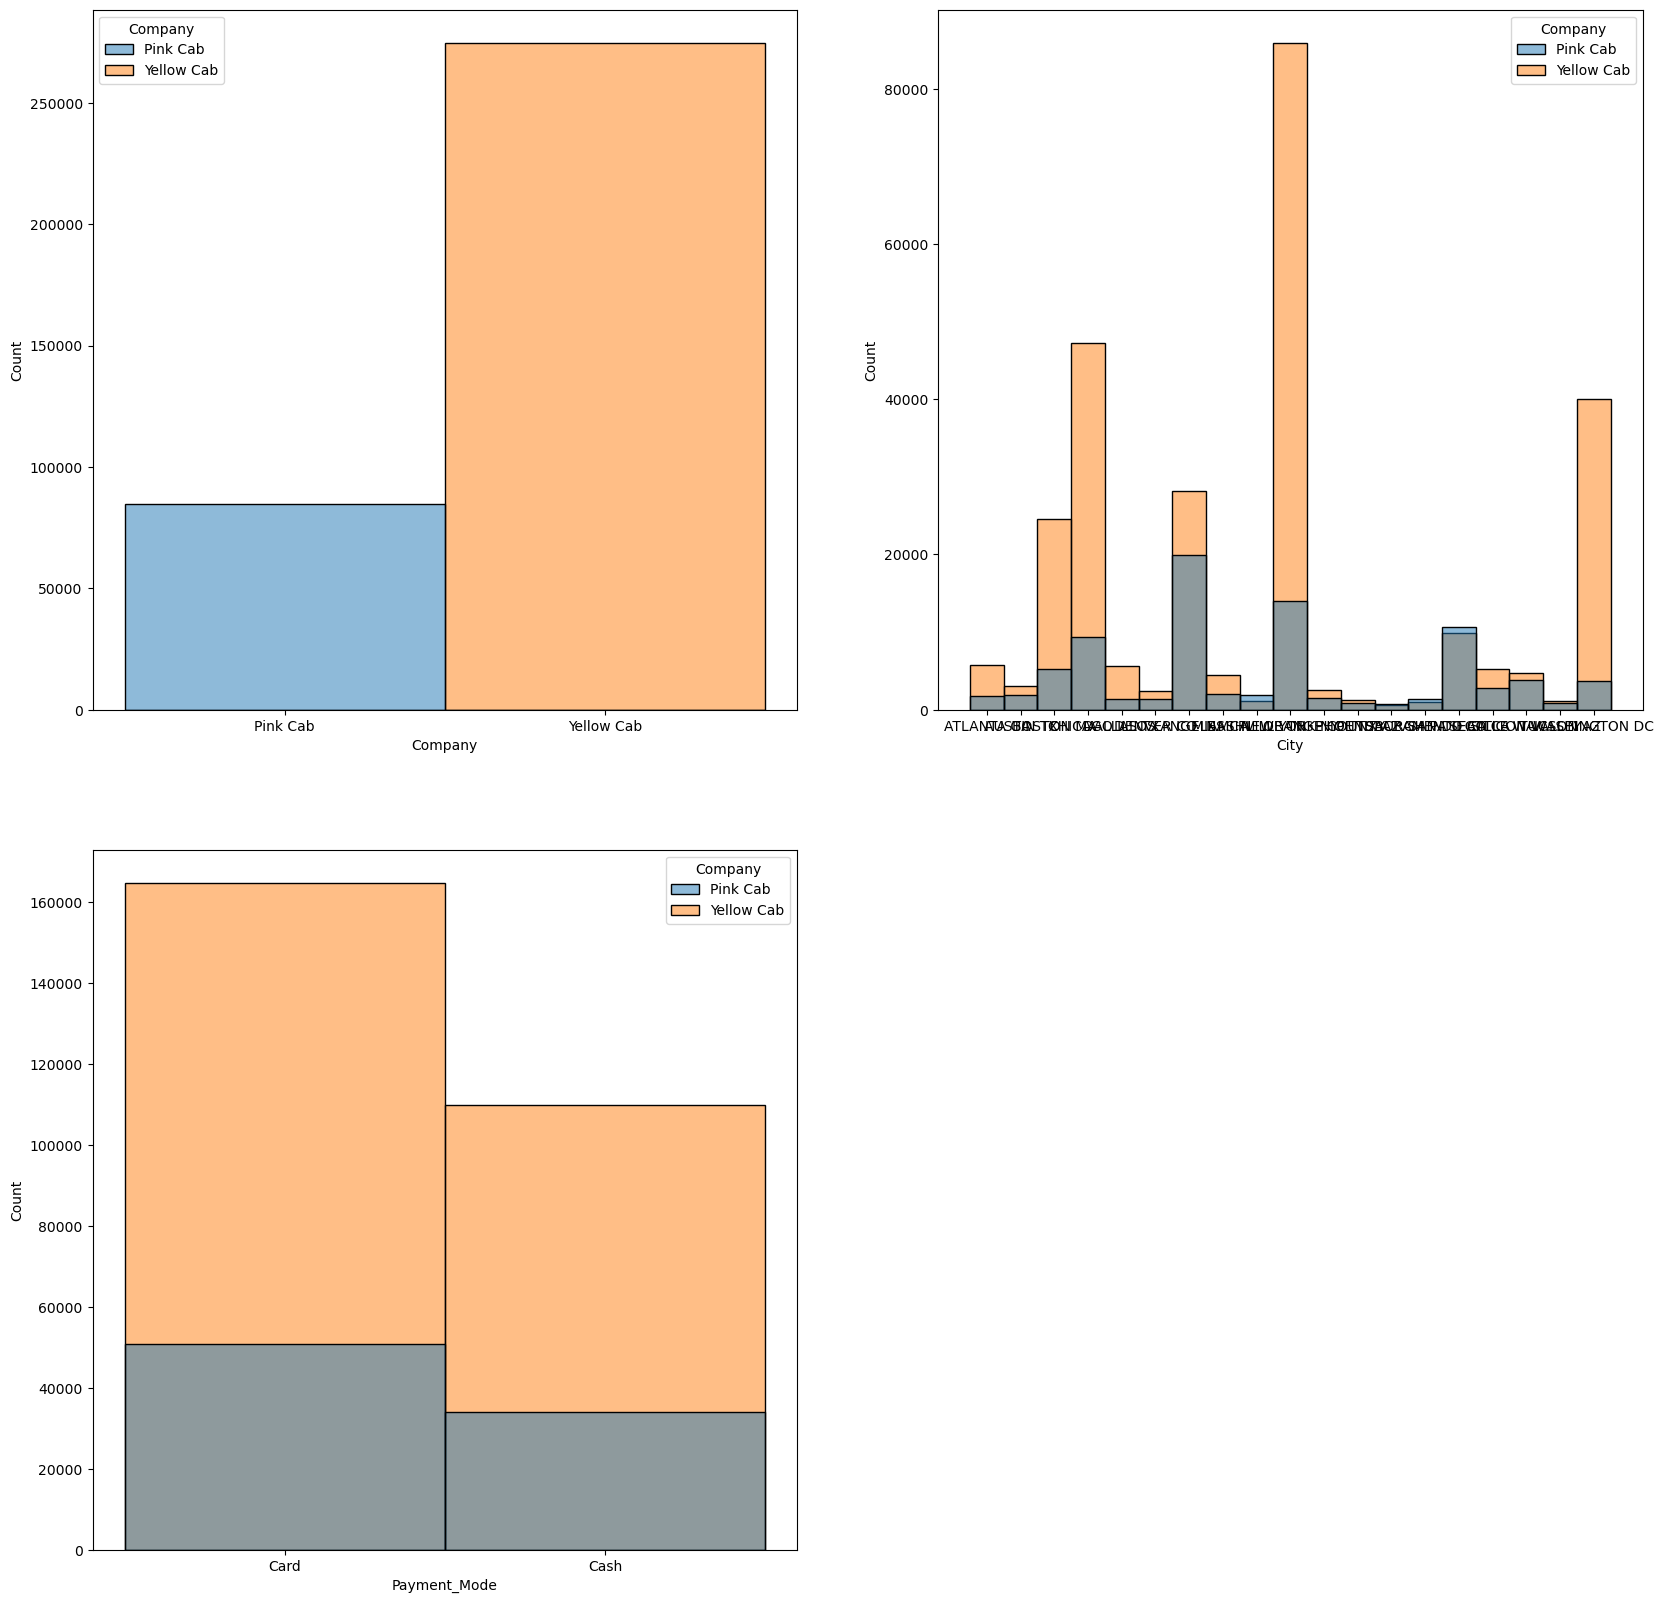

In [69]:

num_var=data3.select_dtypes('float64')
plt.figure(num=10, figsize=(20,20))
platenum=1
for i in cat_var:
    if platenum<10:
        plt.subplot(2,2,platenum)
        sns.histplot(data=data3,x=cat_var[i],hue='Company')
    platenum+=1

<Axes: xlabel='Date of Travel', ylabel='Count'>

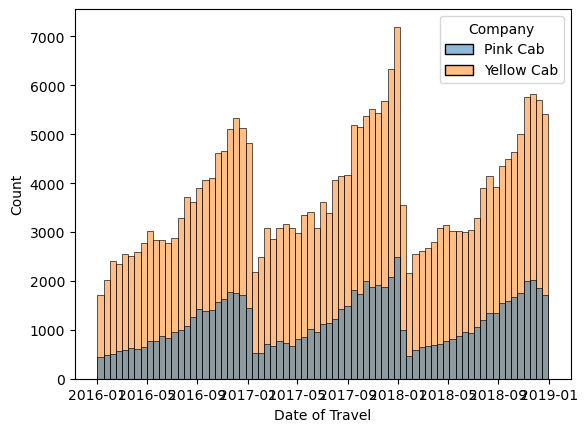

In [81]:
sns.histplot(data=data3,x=data3['Date of Travel'],hue='Company')

* The number of transactions donot change over time between the two companies, they correlate at the specific time of the year
* The number of transactions reduce at the specific time of the year, 2018-01, 2017-01 from both companies.

### Bivariate analysis

<Axes: xlabel='Price Charged', ylabel='Cost of Trip'>

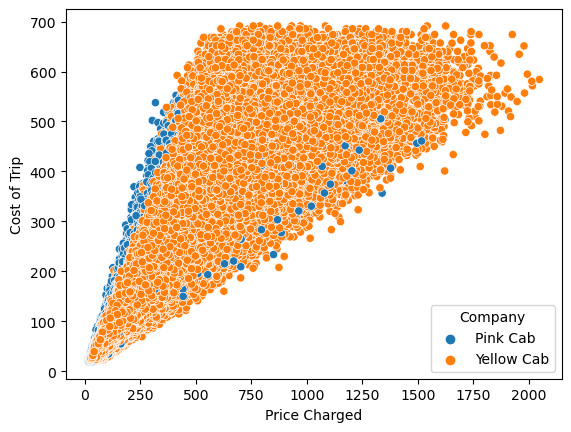

In [59]:

sns.scatterplot(data=data3,x=data3['Price Charged'],y=data3['Cost of Trip'],hue='Company')

<Axes: xlabel='Price Charged', ylabel='KM Travelled'>

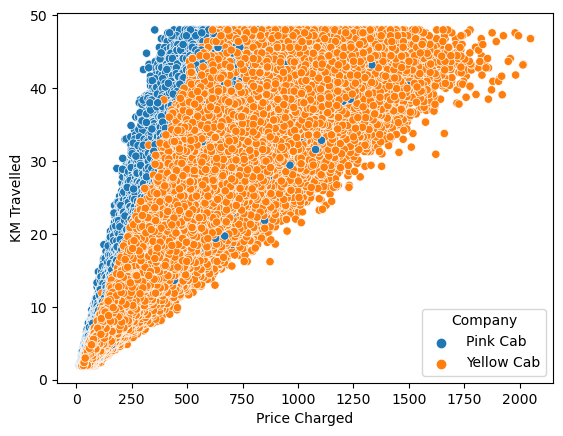

In [60]:
sns.scatterplot(data=data3,x=data3['Price Charged'],y=data3['KM Travelled'],hue='Company')

<Axes: xlabel='Cost of Trip', ylabel='KM Travelled'>

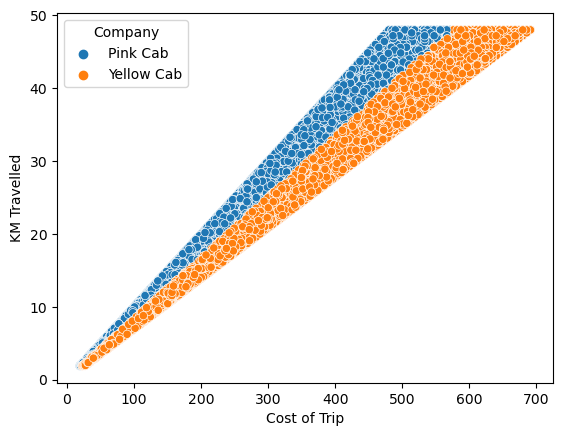

In [62]:
sns.scatterplot(data=data3,y=data3['KM Travelled'],x=data3['Cost of Trip'],hue='Company')

<Axes: xlabel='Price Charged', ylabel='Cost of Trip'>

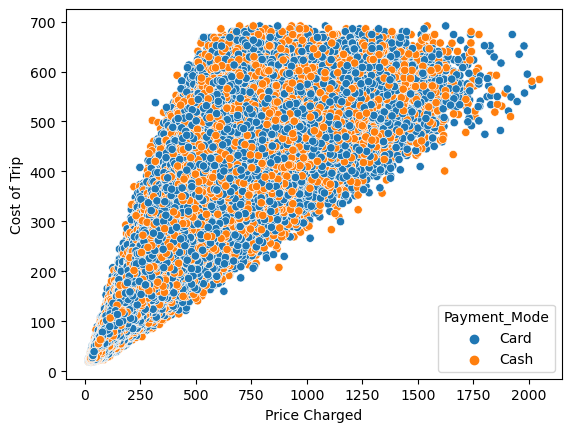

In [64]:
sns.scatterplot(data=data3,x=data3['Price Charged'],y=data3['Cost of Trip'],hue='Payment_Mode')

<Axes: xlabel='Date of Travel', ylabel='Cost of Trip'>

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


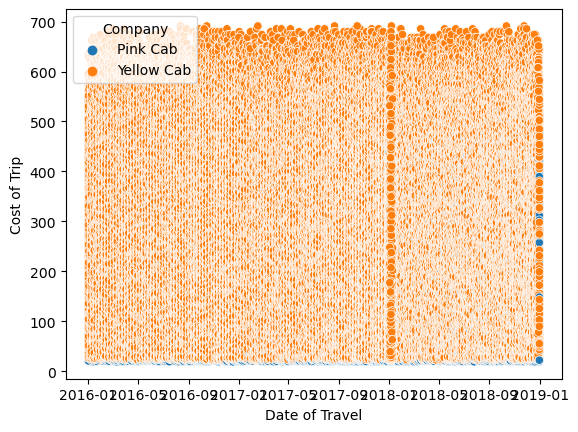

In [83]:
sns.scatterplot(data=data3,x=data3['Date of Travel'],y=data3['Cost of Trip'],hue='Company')

* From the above analysis, cost of the trip is not affected by season or time of the year between all the companies

<Axes: xlabel='Date of Travel', ylabel='Price Charged'>

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


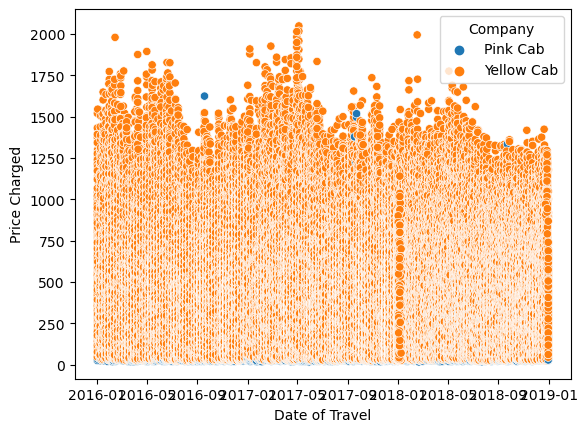

In [84]:
sns.scatterplot(data=data3,x=data3['Date of Travel'],y=data3['Price Charged'],hue='Company')

* Price of the trip was not affected by season or time of the year between the different companies

<Axes: xlabel='Date of Travel', ylabel='Cost of Trip'>

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


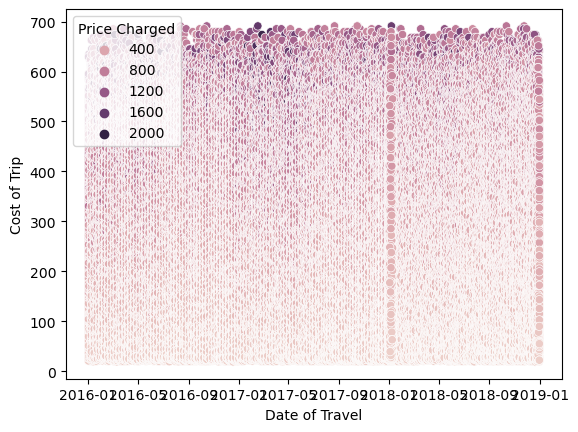

In [85]:
sns.scatterplot(data=data3,x=data3['Date of Travel'],y=data3['Cost of Trip'],hue='Price Charged')

In [ ]:
sns.pairplotplotr

In [67]:
data3_correlation = num_var.corr()
print(data3_correlation)

               KM Travelled  Price Charged  Cost of Trip
KM Travelled       1.000000       0.835753      0.981848
Price Charged      0.835753       1.000000      0.859812
Cost of Trip       0.981848       0.859812      1.000000


* There is a positive correlation between the numerical variables
* On analysis, an increase in the KM travelled, let to an increase in price charged
* The price charged was equally proportional to the cost of the trip, relative to the cost of the trip, a higher charge was more likely charged, this was true for both cab companies
* Analysis of the KM travelled and price charged, the longer the KM, the higher the price charged for the trip